In [1]:
import warnings
warnings.filterwarnings("ignore", category = FutureWarning)

import os
import keras
import h5py
import librosa
import itertools
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict

from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Flatten
from keras.layers import Input
from keras.layers import Dropout
from keras.models import Model
from keras.applications.vgg16 import VGG16
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [2]:
X = np.load('/kaggle/input/data1/x_gtzan_npy.npy')
y = np.load('/kaggle/input/data1/y_gtzan_npy.npy')

In [3]:
y.shape

(19000,)

In [4]:
X.shape

(19000, 128, 129, 1)

In [5]:
X = X[0:7400]
y = y[0:7400]

In [7]:
# One hot encoding of the labels
y = to_categorical(y)

In [5]:
X = X[:10000]

In [6]:
y = y[:10000]

In [8]:
y.shape

(7400, 4)

## **Dataset** ***Split***

In [9]:
X_stack = np.squeeze(np.stack((X,) * 3, -1))
X_stack.shape

(7400, 128, 129, 3)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_stack, y, test_size=0.3, random_state=42, stratify = y)

In [11]:

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5180, 128, 129, 3) (2220, 128, 129, 3) (5180, 4) (2220, 4)


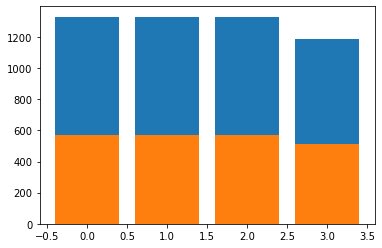

In [12]:
# Histogram for train and test 
values, count = np.unique(np.argmax(y_train, axis=1), return_counts=True)
plt.bar(values, count)

values, count = np.unique(np.argmax(y_test, axis=1), return_counts=True)
plt.bar(values, count)
plt.show()

In [13]:
input_shape = X_train[0].shape
num_genres = 4

In [14]:
input_tensor = Input(shape=input_shape)
vgg16 = VGG16(include_top=False, weights='imagenet',input_shape = input_shape)
top = Sequential()
top.add(Flatten(input_shape=vgg16.output_shape[1:]))
top.add(Dense(256, activation='relu'))
top.add(Dropout(0.5))
top.add(Dense(num_genres, activation='softmax'))
print(vgg16.output_shape[1:])
print(vgg16.input)
print(vgg16.output)
print(top(vgg16.output))
model = Model(inputs=vgg16.input, outputs=top(vgg16.output))


58892288/58889256 [==============================] - 0s 0us/step
(4, 4, 512)
Tensor("input_2:0", shape=(None, 128, 129, 3), dtype=float32)
Tensor("block5_pool/Identity:0", shape=(None, 4, 4, 512), dtype=float32)
Tensor("sequential/Identity:0", shape=(None, 4), dtype=float32)


In [ ]:
print(input_tensor)

In [15]:
top = Sequential()
top.add(Flatten(input_shape=vgg16.output_shape[1:]))
top.add(Dense(256, activation='relu'))
top.add(Dropout(0.5))
top.add(Dense(num_genres, activation='softmax'))
print(vgg16.output_shape[1:])
print(vgg16.input)
print(vgg16.output)
print(top(vgg16.output))

(4, 4, 512)
Tensor("input_2:0", shape=(None, 128, 129, 3), dtype=float32)
Tensor("block5_pool/Identity:0", shape=(None, 4, 4, 512), dtype=float32)
Tensor("sequential_1_1/Identity:0", shape=(None, 10), dtype=float32)


In [15]:
model = Model(inputs=vgg16.input, outputs=top(vgg16.output))

In [ ]:
print(top(vgg16.output))

In [ ]:
print(top)

In [ ]:
model.summary()

In [ ]:
for layer in model.layers :
   print(layer,"----->",layer.trainable)

In [ ]:
len(model.layers)

In [16]:
for i, layer in enumerate(model.layers):
        
        if(i <= 5):
            layer.trainable = False
        else:
            layer.trainable = True

In [ ]:
for layer in model.layers :
   print(layer,"----->",layer.trainable)

In [17]:
early_stopping_callback = EarlyStopping(monitor='val_acc', patience=4)

In [18]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [19]:
hist = model.fit(X_train, y_train,
          batch_size=128,
          epochs=50,
          verbose=1,
          validation_data=(X_test, y_test),
          shuffle=True,
          callbacks=[early_stopping_callback])

Epoch 1/50
41/41 [==============================] - 11s 274ms/step - loss: 2.1371 - accuracy: 0.5021 - val_loss: 0.8662 - val_accuracy: 0.5941
Epoch 2/50
41/41 [==============================] - 9s 230ms/step - loss: 0.8143 - accuracy: 0.6396 - val_loss: 0.7366 - val_accuracy: 0.6743
Epoch 3/50
41/41 [==============================] - 9s 231ms/step - loss: 0.5964 - accuracy: 0.7674 - val_loss: 0.5269 - val_accuracy: 0.7901
Epoch 4/50
41/41 [==============================] - 9s 232ms/step - loss: 0.3911 - accuracy: 0.8651 - val_loss: 0.3470 - val_accuracy: 0.8865
Epoch 5/50
41/41 [==============================] - 9s 229ms/step - loss: 0.3726 - accuracy: 0.8782 - val_loss: 0.3635 - val_accuracy: 0.8698
Epoch 6/50
41/41 [==============================] - 10s 232ms/step - loss: 0.3762 - accuracy: 0.8737 - val_loss: 0.3922 - val_accuracy: 0.8784
Epoch 7/50
41/41 [==============================] - 10s 232ms/step - loss: 0.2900 - accuracy: 0.9058 - val_loss: 0.2505 - val_accuracy: 0.9234
Epo

In [ ]:
for layers in top.layers:
   print(layers)